# Badly Structured Sales Dataset Cleansing

Data retrieved from:
https://foresightbi.com.ng/microsoft-power-bi/dirty-data-samples-to-practice-on/

![](https://foresightbi.com.ng/wp-content/uploads/2020/05/1.jpg)

In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Read file

In [4]:
df = pd.read_excel('C:\\Users\\jorge\\Documents\\GitHub\\badly-structured-sales-data\\1.-Badly-Structured-Sales-Data-1.xlsx')

In [5]:
df.head()

,Segment>>,Consumer,Unnamed: 2,Unnamed: 3,Unnamed: 4,Consumer Total,Corporate,Unnamed: 7,Unnamed: 8,Unnamed: 9,Corporate Total,Home Office,Unnamed: 12,Unnamed: 13,Unnamed: 14,Home Office Total
0,Ship Mode>>,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN
1,Order ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
3,CA-2011-100706,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA-2011-100895,NaN,NaN,NaN,605.47,605.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Row and column count

In [6]:
df.shape

(825, 16)

# Columns with "unnamed" string
Find columns with unnamed string

In [ ]:
filt_contains_unnamed = df.columns.str.contains('Unnamed')

Replace columns with string 'Unnamed'

In [7]:
col_ind = 0

new_cols = []

for i in df.columns.str.contains('Unnamed'):
    if i == True:
        new_cols.append(df.iloc[0, col_ind])
    else:
        new_cols.append(df.columns[col_ind])
    col_ind += 1

df.columns = new_cols

print(df.columns)

Index(['Segment>>', 'Consumer', 'Same Day', 'Second Class', 'Standard Class',
       'Consumer Total', 'Corporate', 'Same Day', 'Second Class',
       'Standard Class', 'Corporate Total', 'Home Office', 'Same Day',
       'Second Class', 'Standard Class', 'Home Office Total'],
      dtype='object')


# Remove special characters

Remove special characters from column names

In [8]:
df.columns = df.columns.str.replace('>', '')

# df.columns = df.columns.str.replace('[>, @, #]', '')

print(df.columns)

Index(['Segment', 'Consumer', 'Same Day', 'Second Class', 'Standard Class',
       'Consumer Total', 'Corporate', 'Same Day', 'Second Class',
       'Standard Class', 'Corporate Total', 'Home Office', 'Same Day',
       'Second Class', 'Standard Class', 'Home Office Total'],
      dtype='object')


In [9]:
# Some column names are located in first row

df.iloc[0]

Segment                 Ship Mode>>
Consumer                First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Consumer Total                  NaN
Corporate               First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Corporate Total                 NaN
Home Office             First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Home Office Total               NaN
Name: 0, dtype: object

In [ ]:
# Rename columns - Option 1 --------------------------------------------

# column_indices = [*range(1, 5)]
# new_names = ['Consumer First Class', 'Consumer Same Day', 'Consumer Second Class', 'Consumer Standard Class']
# old_names = df.columns[column_indices]
# df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [ ]:
# Rename columns - Option 2 --------------------------------------------

# cols_consumer = [i for i in df.columns[1:5]]
# num = 1

# for i in cols_consumer:
#     test = ' '.join(('Consumer', i))
#     df.rename(columns={df.columns[num]: test}, inplace= True)
#     print(df.columns[num])
#     num += 1

# Rename columns

Rename columns - Option 3

In [10]:
df.columns = ['Segment', 'Consumer First Class', 'Consumer Same Day',
       'Consumer Second Class', 'Consumer Standard Class', 'Consumer Total',
       'Corporate', 'Corporate Same Day', 'Corporate Second Class',
       'Corporate Standard Class', 'Corporate Total', 'Home Office',
       'Home Office Same Day', 'Home Office Second Class', 'Home Office Standard Class',
       'Home Office Total']

df.columns

Index(['Segment', 'Consumer First Class', 'Consumer Same Day',
       'Consumer Second Class', 'Consumer Standard Class', 'Consumer Total',
       'Corporate', 'Corporate Same Day', 'Corporate Second Class',
       'Corporate Standard Class', 'Corporate Total', 'Home Office',
       'Home Office Same Day', 'Home Office Second Class',
       'Home Office Standard Class', 'Home Office Total'],
      dtype='object')

# Delete first 2 rows

First and second row had column names so we droped them

In [11]:
df.drop([0, 1], inplace=True)

In [12]:
df.head()

,Segment,Consumer First Class,Consumer Same Day,Consumer Second Class,Consumer Standard Class,Consumer Total,Corporate,Corporate Same Day,Corporate Second Class,Corporate Standard Class,Corporate Total,Home Office,Home Office Same Day,Home Office Second Class,Home Office Standard Class,Home Office Total
2,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
3,CA-2011-100706,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA-2011-100895,NaN,NaN,NaN,605.47,605.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CA-2011-100916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.86,788.86,NaN,NaN,NaN,NaN,NaN
6,CA-2011-101266,NaN,NaN,13.36,NaN,13.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rearrange columns

In [13]:
# Add multiple columns

# df[['new11', 'new22', 'new33']] = pd.DataFrame([[np.nan, np.nan, np.nan]])

In [272]:
# Drop multiple columns

# df.drop(['new11', 'new22', 'new33'], axis=1, inplace=True)

"Segment" column had the wrong name. This column is the "Order ID" column

In [13]:
df.rename(columns={'Segment': 'Order ID'}, inplace=True)

# Insert missing columns

Insert "Segment" column in dataframe

In [15]:
df.insert(0, 'Segment', np.nan)

Insert "Ship Mode" column in dataframe

In [17]:
df.insert(0, 'Ship Mode', np.nan)

I made a mistake and inserted the Ship Mode before the Segment column
Reorder a single column - Insert and then delete the same column - Values stay the same

In [19]:
df.insert(0, 'Segment', df.pop('Segment'))

Added the "Sales" column as it was also missing

In [32]:
df.insert(3, 'Sales', np.nan)

In [33]:
df.head()

,Segment,Ship Mode,Order ID,Sales,Consumer First Class,Consumer Same Day,Consumer Second Class,Consumer Standard Class,Consumer Total,Corporate,Corporate Same Day,Corporate Second Class,Corporate Standard Class,Corporate Total,Home Office,Home Office Same Day,Home Office Second Class,Home Office Standard Class,Home Office Total
2,NaN,NaN,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
3,NaN,NaN,CA-2011-100706,NaN,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,CA-2011-100895,NaN,NaN,NaN,NaN,605.47,605.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,CA-2011-100916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.86,788.86,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,CA-2011-101266,NaN,NaN,NaN,13.36,NaN,13.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Review dataframe's data

First columns to loop through

In [23]:
df.iloc[:, 0:8]

,Segment,Ship Mode,Order ID,Consumer First Class,Consumer Same Day,Consumer Second Class,Consumer Standard Class,Consumer Total
2,NaN,NaN,CA-2011-100293,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,CA-2011-100706,NaN,NaN,129.44,NaN,129.440
4,NaN,NaN,CA-2011-100895,NaN,NaN,NaN,605.47,605.470
5,NaN,NaN,CA-2011-100916,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,CA-2011-101266,NaN,NaN,13.36,NaN,13.360
...,...,...,...,...,...,...,...,...
820,NaN,NaN,US-2014-166611,NaN,NaN,NaN,NaN,NaN
821,NaN,NaN,US-2014-167920,NaN,NaN,1827.51,NaN,1827.510
822,NaN,NaN,US-2014-168116,NaN,NaN,NaN,NaN,NaN
823,NaN,NaN,US-2014-168690,NaN,NaN,NaN,2.808,2.808


Change data type of "Consumer Second Class" column to numeric

In [24]:
df['Consumer Second Class'] = pd.to_numeric(df['Consumer Second Class'])

Filter float values in column

In [25]:
filt = df['Consumer Second Class'].apply(type) == float

df.loc[filt]['Consumer Second Class']

2             NaN
3        129.4400
4             NaN
5             NaN
6         13.3600
          ...    
820           NaN
821     1827.5100
822           NaN
823           NaN
824    49724.2545
Name: Consumer Second Class, Length: 823, dtype: float64

Apparently all of the values are Float, including nan values.
So I need to use a different filter.
Next code shows the different data types in the column.

In [27]:
df['Consumer Second Class'].apply(type)

2      <class 'float'>
3      <class 'float'>
4      <class 'float'>
5      <class 'float'>
6      <class 'float'>
            ...       
820    <class 'float'>
821    <class 'float'>
822    <class 'float'>
823    <class 'float'>
824    <class 'float'>
Name: Consumer Second Class, Length: 823, dtype: object

# Loop through rows

If any of the columns contain either "Class" or "Day" then it contains the sales amount we need to classify

Next code gets all of those columns with any of these elements on their name ['Class', 'Day']

In [65]:
look_for = ['Class', 'Day']
columns_with_data = []

for i in df.columns[4:-1]:
    for f in look_for:
        if f in i:
            columns_with_data.append(i)

print(columns_with_data)

['Consumer First Class', 'Consumer Same Day', 'Consumer Second Class', 'Consumer Standard Class', 'Corporate Same Day', 'Corporate Second Class', 'Corporate Standard Class', 'Home Office Same Day', 'Home Office Second Class', 'Home Office Standard Class']


We got the columns, now we need to split the column names to get the type of "Customer" and the "Ship Mode"
First element is Customer, second one is Ship Mode
We had to do a special code for the "Home Office" columns because it is composed of two words rather than one (Consumer vs Home Office)

In [90]:
columns_split = []

for i in columns_with_data:
    if 'Home Office' in i:
        n=2
        groups= i.split(' ')
        split_office = [' '.join(groups[:n]), ' '.join(groups[n:])]
        columns_split.append(split_office)
    else:
        columns_split.append(i.split(' ', maxsplit=1))

print(columns_split)

[['Consumer', 'First Class'], ['Consumer', 'Same Day'], ['Consumer', 'Second Class'], ['Consumer', 'Standard Class'], ['Corporate', 'Same Day'], ['Corporate', 'Second Class'], ['Corporate', 'Standard Class'], ['Home Office', 'Same Day'], ['Home Office', 'Second Class'], ['Home Office', 'Standard Class']]


Now we got the column names and we have splitted all of them to get the Customer type and Ship Mode
Now we are iterating through each one of these columns and their corresponding rows to assign values to the columns
The code looks for non "nan" values

In [122]:
n = 0

for i in columns_with_data:
    for f in df.index:
        if pd.isna(df.loc[f, i]) == False:
            df.loc[[f], ['Segment']] = columns_split[n][0]
            df.loc[[f], ['Ship Mode']] = columns_split[n][1]
            df.loc[[f], ['Sales']] = df.loc[f, i]
    n = n+1



In the next code we can see that all the non 'nan' values in the column "Consumer Second Class"
are correctly classified in Segment, Ship Mode and Sales

In [123]:
filt = pd.isna(df['Segment']) == False

df[['Segment', 'Ship Mode', 'Sales', 'Consumer Second Class']].loc[filt]

,Segment,Ship Mode,Sales,Consumer Second Class
2,Home Office,Standard Class,91.0560,NaN
3,Consumer,Second Class,129.4400,129.4400
4,Consumer,Standard Class,605.4700,NaN
5,Corporate,Standard Class,788.8600,NaN
6,Consumer,Second Class,13.3600,13.3600
...,...,...,...,...
820,Corporate,Standard Class,68.7420,NaN
821,Consumer,Second Class,1827.5100,1827.5100
822,Corporate,Same Day,8167.4200,NaN
823,Consumer,Standard Class,2.8080,NaN


In [136]:
df.head()

,Segment,Ship Mode,Order ID,Sales,Consumer First Class,Consumer Same Day,Consumer Second Class,Consumer Standard Class,Consumer Total,Corporate,Corporate Same Day,Corporate Second Class,Corporate Standard Class,Corporate Total,Home Office,Home Office Same Day,Home Office Second Class,Home Office Standard Class,Home Office Total
2,Home Office,Standard Class,CA-2011-100293,91.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
3,Consumer,Second Class,CA-2011-100706,129.440,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Consumer,Standard Class,CA-2011-100895,605.470,NaN,NaN,NaN,605.47,605.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Corporate,Standard Class,CA-2011-100916,788.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.86,788.86,NaN,NaN,NaN,NaN,NaN
6,Consumer,Second Class,CA-2011-101266,13.360,NaN,NaN,13.36,NaN,13.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Some numbers missing

There are some rows that had no amount in the defined columns. They were either on the total column 
from each group or in the first column of the row, which is not supposed to have any data.

In [137]:
filt = pd.isna(df['Segment']) == True

print(df.loc[filt].count())

Segment                        0
Ship Mode                      0
Order ID                      52
Sales                          0
Consumer First Class           0
Consumer Same Day              0
Consumer Second Class          0
Consumer Standard Class        0
Consumer Total                 0
Corporate                     40
Corporate Same Day             0
Corporate Second Class         0
Corporate Standard Class       0
Corporate Total               40
Home Office                   12
Home Office Same Day           0
Home Office Second Class       0
Home Office Standard Class     0
Home Office Total             12
dtype: int64


Do both of the columns (Corporate & Corporate Total, Home Office & Home Office Total) have the same total amount?
It seems like they do, so we can use any of the columns.

In [141]:
filt = pd.isna(df['Segment']) == True

print(df[['Corporate', 'Corporate Total', 'Home Office', 'Home Office Total']].loc[filt].sum())

Corporate            20792.607
Corporate Total      20792.607
Home Office           7737.786
Home Office Total     7737.786
dtype: object


The following loop iterates through the pending rows and does the same as the past one.
We only changed the columns it is iterating through.

In [142]:
n = 0

columns_missing = ['Corporate', 'Home Office']

for i in columns_missing:
    for f in df.index:
        if pd.isna(df.loc[f, i]) == False:
            df.loc[[f], ['Segment']] = columns_missing[n]
            df.loc[[f], ['Ship Mode']] = None
            df.loc[[f], ['Sales']] = df.loc[f, i]
    n = n+1


Now we don't have any empty values in any of the rows for the "Segment" column.
We still have some empty values in the "Ship Mode" column but we don't have any way of getting that data.

In [143]:
filt = pd.isna(df['Segment']) == True

print(df.loc[filt].count())

Segment                       0
Ship Mode                     0
Order ID                      0
Sales                         0
Consumer First Class          0
Consumer Same Day             0
Consumer Second Class         0
Consumer Standard Class       0
Consumer Total                0
Corporate                     0
Corporate Same Day            0
Corporate Second Class        0
Corporate Standard Class      0
Corporate Total               0
Home Office                   0
Home Office Same Day          0
Home Office Second Class      0
Home Office Standard Class    0
Home Office Total             0
dtype: int64


# Drop certain columns
We are no longer using some of the columns as we took all the data that we needed from them.

In [162]:
df.drop(df.columns[4:-1], axis=1, inplace=True)

In [168]:
df.drop(df.columns[-1], axis=1, inplace=True)

# Finished DataFrame

In [169]:
df

,Segment,Ship Mode,Order ID,Sales
2,Home Office,Standard Class,CA-2011-100293,91.056
3,Consumer,Second Class,CA-2011-100706,129.440
4,Consumer,Standard Class,CA-2011-100895,605.470
5,Corporate,Standard Class,CA-2011-100916,788.860
6,Consumer,Second Class,CA-2011-101266,13.360
...,...,...,...,...
820,Corporate,Standard Class,US-2014-166611,68.742
821,Consumer,Second Class,US-2014-167920,1827.510
822,Corporate,Same Day,US-2014-168116,8167.420
823,Consumer,Standard Class,US-2014-168690,2.808


In [170]:
df.sort_values(by='Order ID')

,Segment,Ship Mode,Order ID,Sales
2,Home Office,Standard Class,CA-2011-100293,91.056
3,Consumer,Second Class,CA-2011-100706,129.440
4,Consumer,Standard Class,CA-2011-100895,605.470
5,Corporate,Standard Class,CA-2011-100916,788.860
6,Consumer,Second Class,CA-2011-101266,13.360
...,...,...,...,...
819,Consumer,Standard Class,US-2014-166233,24.000
820,Corporate,Standard Class,US-2014-166611,68.742
821,Consumer,Second Class,US-2014-167920,1827.510
822,Corporate,Same Day,US-2014-168116,8167.420


# Sample row
This is the first row showed in the "Clean" table image on top of this file.
The data in each of the columns matches with the example.

In [174]:
filt = (df['Order ID'] == 'CA-2011-103366') & (df['Sales'] == 149.95)

df.loc[filt]

,Segment,Ship Mode,Order ID,Sales
13,Consumer,First Class,CA-2011-103366,149.95


# Heatmap
View empty and non-empty values.
We have the values in the "Ship Mode" column missing.

<AxesSubplot:>

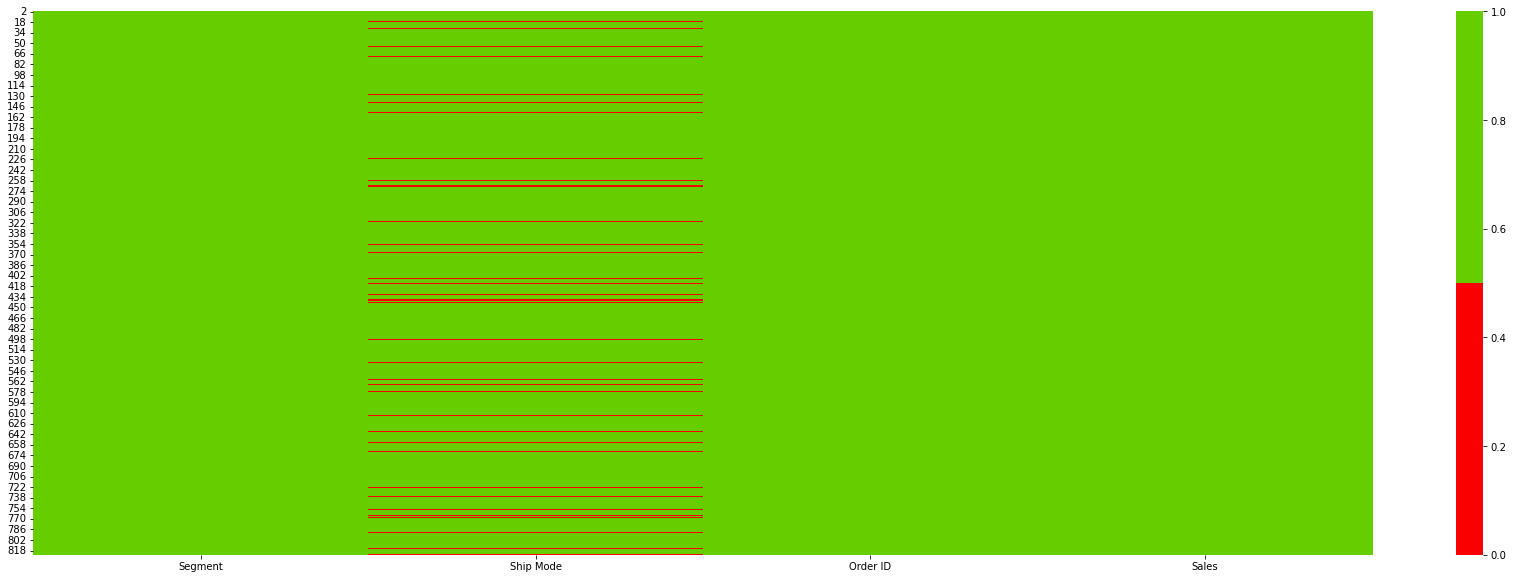

In [179]:
nonempty_cells = df.notnull()

plt.subplots(figsize=(30,10))

sns.heatmap(nonempty_cells, cmap=sns.color_palette(['#fa0000', '#66cd00']))